In [38]:
import tensorflow as tf
from src.dataset import dataset_tf, validation_tf
from src.audio import to_mfccs_dataset, to_spectrogram_dataset
from src.model import get_seq_model, get_conv_model, callbacks, get_conv_model_mini
from src.plots import plot_history, plot_mfccs, plot_spectrograms
LEARNING_RATE = 0.0001
# train_ds, val_ds, label_names = dataset_tf("./dataset/osbh_pure", 0.2, 16)
train_ds, val_ds, label_names = dataset_tf("dataset/osbh_sep_2", 0.2, 10)

Found 900 files belonging to 2 classes.
Using 720 files for training.
Using 180 files for validation.
label names: ['noqueen' 'queen']
(TensorSpec(shape=(None, 4000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Example audio shape: (10, 4000)
Example label shape: (10,)
513 44100
Label: noqueen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)
513 44100
Label: queen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)


In [39]:
train_mfccs_ds = to_mfccs_dataset(train_ds)
val_mfccs_ds = to_mfccs_dataset(val_ds)
train_spectrogram_ds = to_spectrogram_dataset(train_ds)
val_spectrogram_ds = to_spectrogram_dataset(val_ds)

513 44100
513 44100


# Initial models (OSBH)

## MFCCs

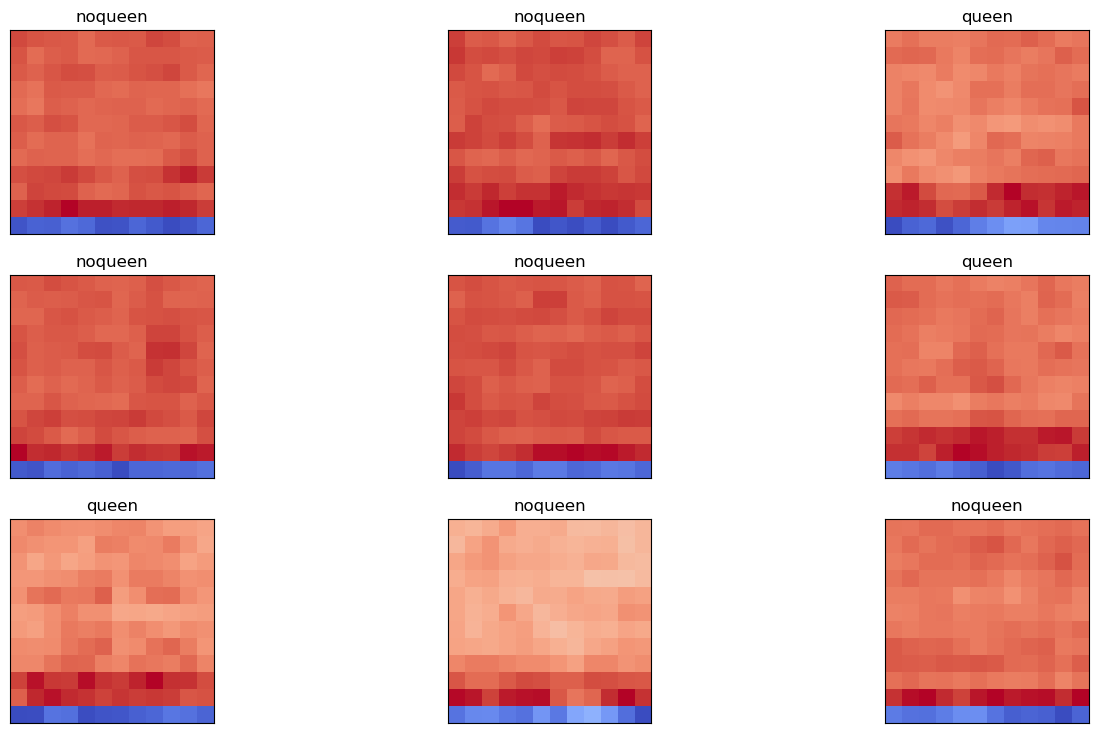

In [40]:
for example_spectrograms, example_spect_labels in train_mfccs_ds.take(1):
  break
# (TensorShape([118, 129, 1])
input_shape = example_spectrograms.shape[1:]
plot_mfccs(example_spectrograms, example_spect_labels, label_names)

In [41]:
train_mfccs_ds = train_mfccs_ds.map(lambda x, y: (tf.expand_dims(x, -1), y))
val_mfccs_ds = val_mfccs_ds.map(lambda x, y: (tf.expand_dims(x, -1), y))
for example_spectrograms, example_spect_labels in train_mfccs_ds.take(1):
  break
input_shape = example_spectrograms.shape[1:]
input_shape

TensorShape([12, 12, 1])

In [42]:
train_mfccs_ds = train_mfccs_ds.cache().shuffle(10000).prefetch(tf.data.AUTOTUNE)
val_mfccs_ds = val_mfccs_ds.cache().prefetch(tf.data.AUTOTUNE)

### [MFCCs] Sequential model

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6282 - loss: 0.6222 - val_accuracy: 0.9167 - val_loss: 0.4057
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8704 - loss: 0.3959 - val_accuracy: 0.9389 - val_loss: 0.2464
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8953 - loss: 0.3052 - val_accuracy: 0.9333 - val_loss: 0.2243
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9282 - loss: 0.2762 - val_accuracy: 0.9278 - val_loss: 0.1971
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9159 - loss: 0.2639 - val_accuracy: 0.9444 - val_loss: 0.1880
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9414 - loss: 0.2161 - val_accuracy: 0.9500 - val_loss: 0.1688
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9242 - loss: 0.2489 - val_accuracy: 0.9500 - val_loss: 0.1533


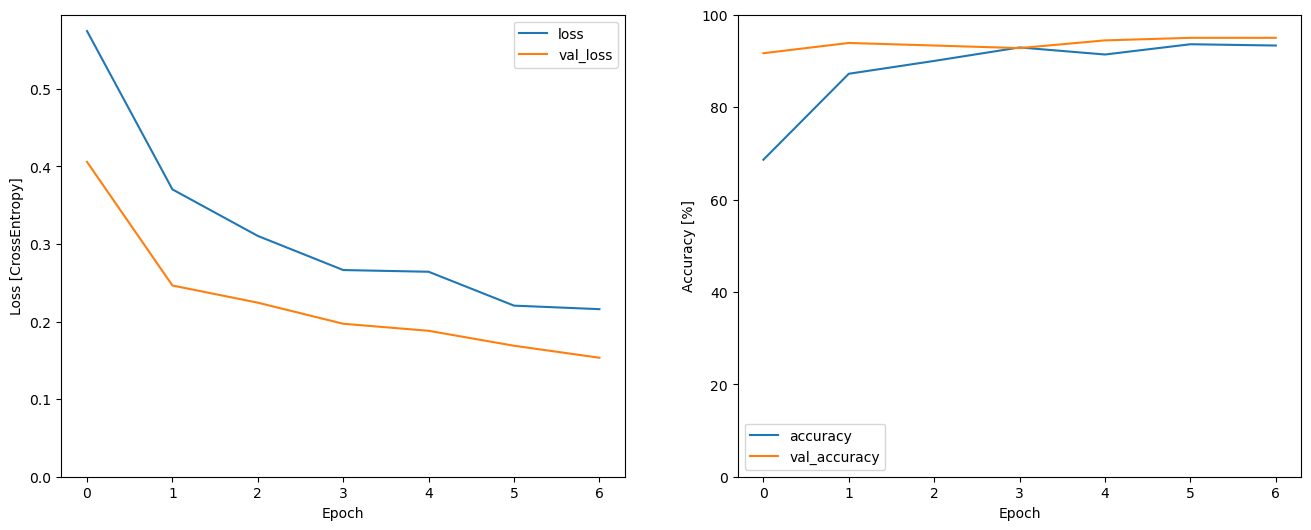

In [43]:
model_mfcc_seq = get_seq_model(input_shape, len(label_names), train_mfccs_ds)
model_mfcc_seq.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history_mfcc_seq = model_mfcc_seq.fit(
    train_mfccs_ds,
    validation_data=val_mfccs_ds,
    epochs=20,
    callbacks=callbacks
)
plot_history(history_mfcc_seq)

### [MFCCs] Convolutional model (mini)

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4796 - loss: 0.7152 - val_accuracy: 0.6389 - val_loss: 0.6334
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.6419 - loss: 0.6258 - val_accuracy: 0.6667 - val_loss: 0.5807
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.6877 - loss: 0.5662 - val_accuracy: 0.7222 - val_loss: 0.5392
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.7575 - loss: 0.5500 - val_accuracy: 0.7833 - val_loss: 0.5005
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.7869 - loss: 0.5281 - val_accuracy: 0.7611 - val_loss: 0.4650
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.8082 - loss: 0.4834 - val_accuracy: 0.8500 - val_loss: 0.4316
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.8664 - loss: 0.4326 - val_accuracy: 0.8444 - val_loss: 0.4011


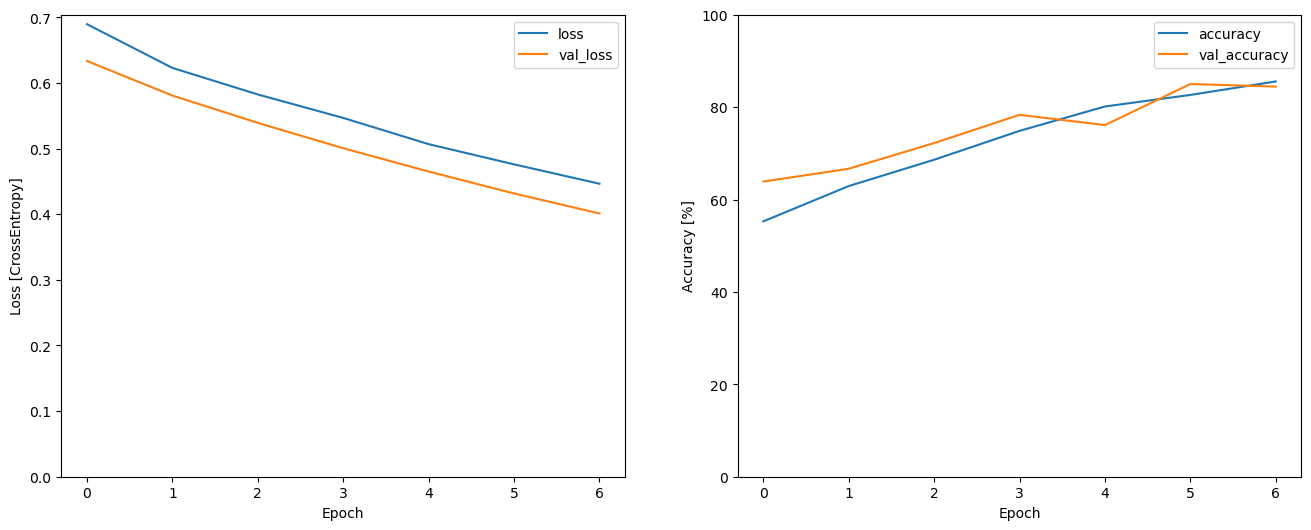

In [44]:
model_mfcc_conv = get_conv_model_mini(input_shape, len(label_names))
model_mfcc_conv.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
history_mfcc_conv = model_mfcc_conv.fit(
    train_mfccs_ds, 
    validation_data=val_mfccs_ds, 
    epochs=20,
    callbacks=callbacks
)
plot_history(history_mfcc_conv)

## Spectrograms

(118, 129, 1)


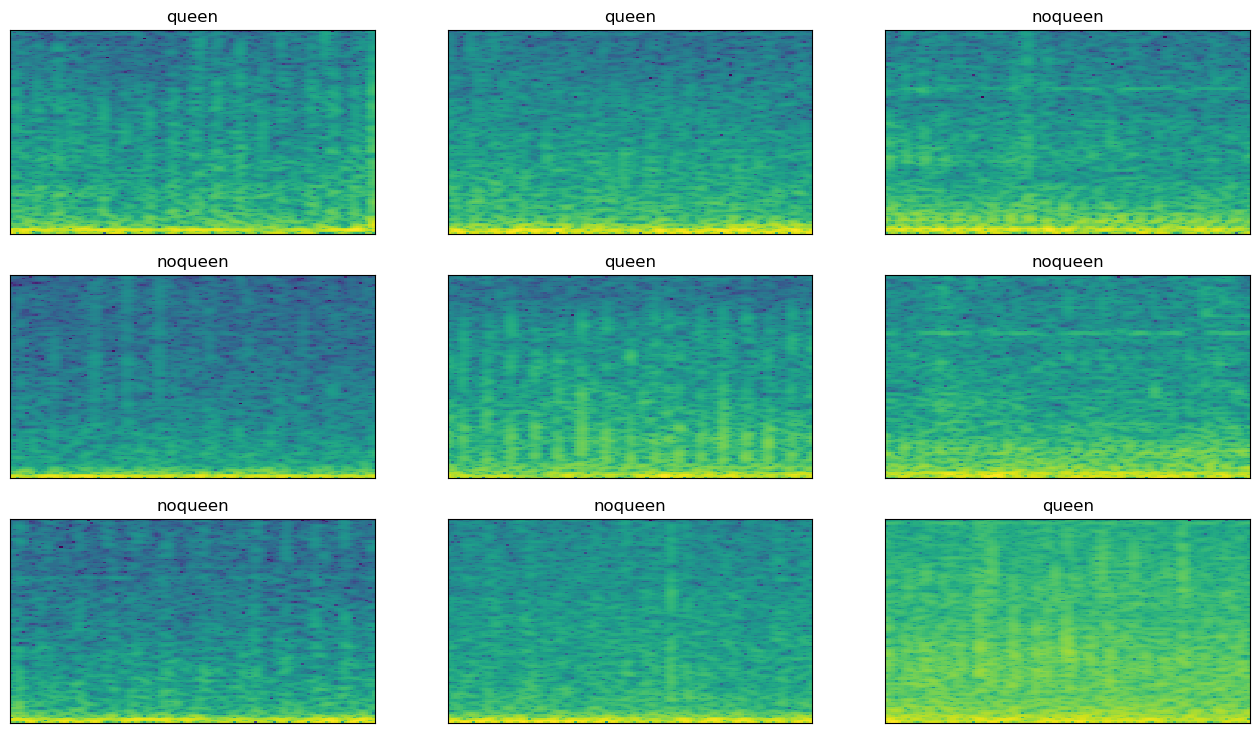

In [45]:
for example_spectrograms, example_spect_labels in train_spectrogram_ds.take(1):
  break
# (TensorShape([118, 129, 1])
input_shape = example_spectrograms.shape[1:]
print(input_shape)
plot_spectrograms(example_spectrograms, example_spect_labels, label_names)

In [46]:
train_spectrogram_ds = train_spectrogram_ds.cache().shuffle(10000).prefetch(tf.data.AUTOTUNE)
val_spectrogram_ds = val_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)

### [Spec] Sequential model

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5990 - loss: 0.6396 - val_accuracy: 0.6389 - val_loss: 0.5726
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6500 - loss: 0.5836 - val_accuracy: 0.7278 - val_loss: 0.4922
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8054 - loss: 0.4774 - val_accuracy: 0.8278 - val_loss: 0.4490
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8426 - loss: 0.4480 - val_accuracy: 0.9278 - val_loss: 0.3249
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8736 - loss: 0.3521 - val_accuracy: 0.9278 - val_loss: 0.2817
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9102 - loss: 0.3106 - val_accuracy: 0.9444 - val_loss: 0.2505
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9140 - loss: 0.2829 - val_accuracy: 0.9556 - val_loss: 0.2162


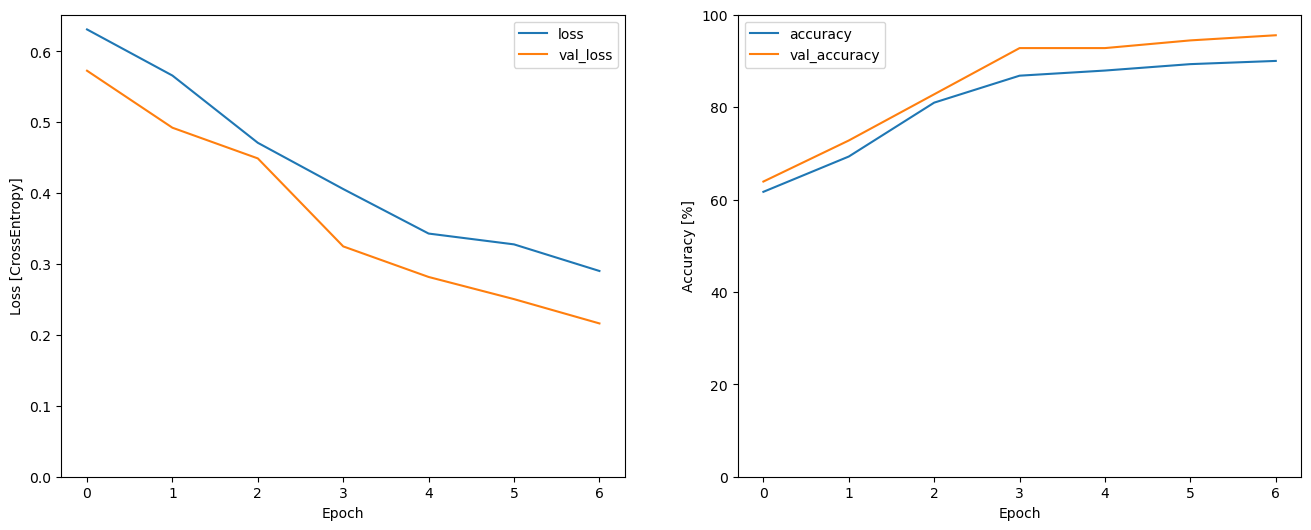

In [47]:
model_spec_seq = get_seq_model(input_shape, len(label_names), train_spectrogram_ds)
model_spec_seq.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history_spec_seq = model_spec_seq.fit(
    train_spectrogram_ds,
    validation_data=val_spectrogram_ds,
    epochs=20,
    callbacks=callbacks
)
plot_history(history_spec_seq)

### [Spec] Convolutional model

Epoch 1/20


72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6144 - loss: 0.6439 - val_accuracy: 0.7667 - val_loss: 0.5493
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7579 - loss: 0.5487 - val_accuracy: 0.8722 - val_loss: 0.4478
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8650 - loss: 0.4358 - val_accuracy: 0.8944 - val_loss: 0.3573
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8783 - loss: 0.3567 - val_accuracy: 0.8667 - val_loss: 0.3080
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8960 - loss: 0.3153 - val_accuracy: 0.9167 - val_loss: 0.2484
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9020 - loss: 0.2714 - val_accuracy: 0.9056 - val_loss: 0.2606
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9002 - loss: 0.2727 - val_accuracy: 0.9278 - val_loss: 0.2069


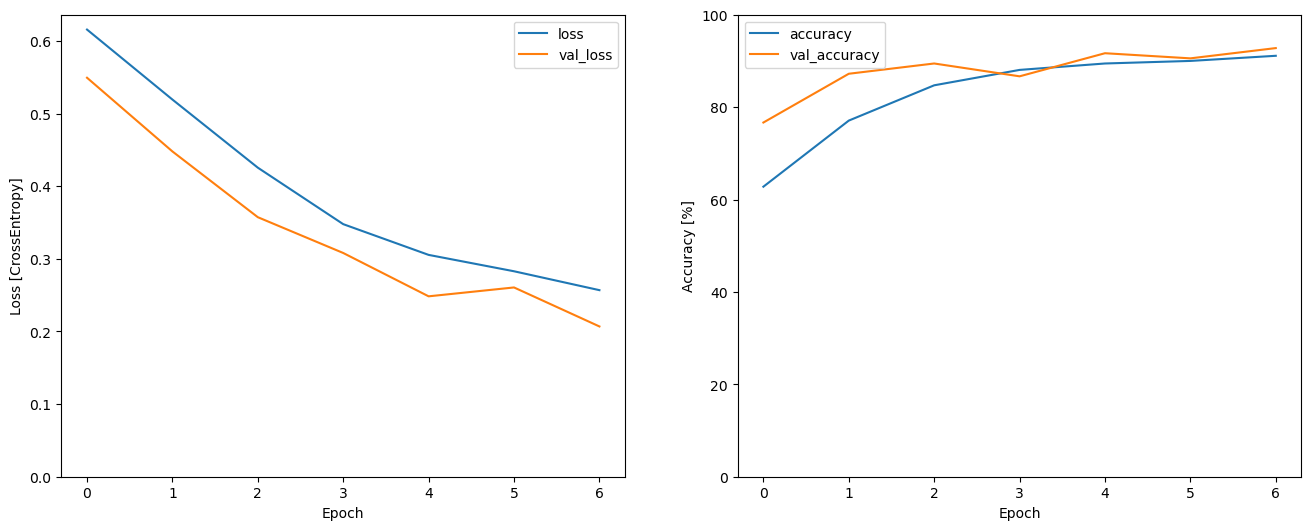

In [48]:
model_spec_conv = get_conv_model_mini(input_shape, len(label_names))
model_spec_conv.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
history_spec_conv = model_spec_conv.fit(
    train_spectrogram_ds, 
    validation_data=val_spectrogram_ds, 
    epochs=20,
    callbacks=callbacks
)
plot_history(history_spec_conv)

# Save models

In [49]:
model_mfcc_seq.save('models/mfcc_seq.keras')
model_mfcc_conv.save('models/mfcc_conv_mini.keras')
model_spec_seq.save('models/spec_seq.keras')
model_spec_conv.save('models/spec_conv.keras')

In [50]:
history_spec_conv

# Summary

In [51]:
def history_to_summary(prefix: str, history):
    print(f"{prefix}:    Loss: {history.history['loss'][-1]:.2f}, Acc: {history.history['accuracy'][-1]:.2f}, Val. Loss: {history.history['val_loss'][-1]:.2f}, Val. Acc: {history.history['val_accuracy'][-1]:.2f}" )

history_to_summary("MFCCs + Sequential model       ", history_mfcc_seq)
history_to_summary("MFCCs + Conv model             ", history_mfcc_conv)
history_to_summary("Spectrogram + Sequential model ", history_spec_seq)
history_to_summary("Spectrogram + Conv model       ", history_spec_conv)


MFCCs + Sequential model       :    Loss: 0.22, Acc: 0.93, Val. Loss: 0.15, Val. Acc: 0.95
MFCCs + Conv model             :    Loss: 0.45, Acc: 0.86, Val. Loss: 0.40, Val. Acc: 0.84
Spectrogram + Sequential model :    Loss: 0.29, Acc: 0.90, Val. Loss: 0.22, Val. Acc: 0.96
Spectrogram + Conv model       :    Loss: 0.26, Acc: 0.91, Val. Loss: 0.21, Val. Acc: 0.93


In [52]:
model_spec_conv.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 118, 129, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 116, 127, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 58, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 56, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 28, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 26880)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │       860,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,595,176 (9.90 MB)

 Trainable params: 865,058 (3.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,730,118 (6.60 MB)